In [1]:
%run twisted_graphene.py

In [45]:
g=TwistedBilayerGraphene(1,0)

In [46]:
np.sqrt(3.35**2+2.46**2)

4.156212217873385

In [47]:
g.calc_hops(3.36)

/home/vgmdu/MEGA/Física/Twistrônica/code/twisted_graphene.py:208: RuntimeWarning: invalid value encountered in true_divide
  xx=np.nan_to_num(x/r) #cosseno direcional na direção x
/home/vgmdu/MEGA/Física/Twistrônica/code/twisted_graphene.py:209: RuntimeWarning: invalid value encountered in true_divide
  yy=np.nan_to_num(y/r) #cosseno direcional na direção y


In [48]:
g.set_kpath(g.path_GMKG,[100,50,100])

In [49]:
g.set_hamiltonian(1.0,1.5)

In [50]:
g.calc_bands_and_layer_characters(4,0.0)

In [51]:
g.bandsV=g.bands
g.layer2_characterV=g.layer2_character

In [52]:
g.set_hamiltonian(1.0,0.0)

In [53]:
g.calc_bands_and_layer_characters(4,0.0)

In [54]:
g.bands0=g.bands
g.layer2_character0=g.layer2_character

In [55]:
def plot_bands_with_cmap(bands,ell,weights,cmap,marker='.'):
    vmin=np.min(weights)
    vmax=np.max(weights)
    for i in range(bands.shape[1]):
        plt.scatter(ell,bands[:,i],c=weights[:,i],cmap=cmap,marker=marker,vmin=vmin,vmax=vmax,s=0.2)

In [56]:
t1=2.8922
tp=0.3155
V=1.5
tp_V=np.sqrt(tp**2+(V/2)**2)

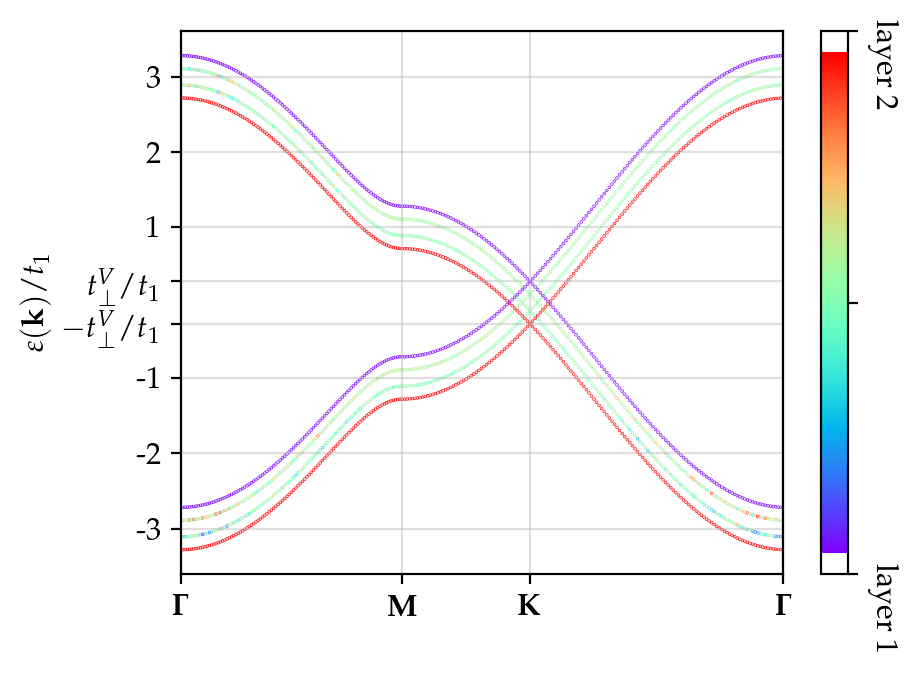

In [70]:
plot_bands_with_cmap(g.bands0/2.8922,g.ell,g.layer2_character0,'rainbow',marker='.')
plot_bands_with_cmap(g.bandsV/2.8922,g.ell,g.layer2_characterV,'rainbow',marker='.')

cbar=plt.colorbar()
cbar.set_ticks([0,0.5,1.0],labels=['layer 1','','layer 2'],rotation=270,)


plt.grid(True,alpha=0.4)
plt.xlim((g.ell[0],g.ell[-1]))
plt.xticks(g.ell[g.kticks],['$\mathbf{\Gamma}$','$\mathbf{M}$','$\mathbf{K}$','$\mathbf{\Gamma}$'])
plt.ylabel('$\\varepsilon(\mathbf{k})/t_1$')
plt.yticks([-3,-2,-1,-tp_V/t1,tp_V/t1,1,2,3],['-3','-2','-1','$-t_{\perp}^V/t_1$','$t_{\perp}^V/t_1$','1','2','3'])

plt.savefig('Fig19_graphene_AA_electric_field.svg')

plt.show()

In [58]:
from ipywidgets import interact

In [30]:
@interact(V=(0.1,5.0,0.1))
def plot(V=0.1):
    g.set_hamiltonian(1.0,V)

    g.calc_bands_and_layer_characters(4,0.0)

    g.bandsV=g.bands
    g.layer2_characterV=g.layer2_character

    g.set_hamiltonian(1.0,0.0)

    g.calc_bands_and_layer_characters(4,0.0)

    g.bands0=g.bands
    g.layer2_character0=g.layer2_character

    plot_bands_with_cmap(g.bands0/2.8922,g.ell,g.layer2_character0,'rainbow',marker='.')
    plot_bands_with_cmap(g.bandsV/2.8922,g.ell,g.layer2_characterV,'rainbow',marker='.')

    cbar=plt.colorbar()
    cbar.set_ticks([0,0.5,1.0],labels=['layer 1','','layer 2'],rotation=270,)


    plt.grid(True,alpha=0.4)
    plt.xlim((g.ell[0],g.ell[-1]))
    plt.xticks(g.ell[g.kticks],['$\mathbf{\Gamma}$','$\mathbf{M}$','$\mathbf{K}$','$\mathbf{\Gamma}$'])
    plt.ylabel('$\\varepsilon(\mathbf{k})/t_1$')
    plt.yticks([-3,-2,-1,-0.3155-V/(2*2.8922),0,0.3155+V/(2*2.8922),1,2,3],['-3','-2','-1','$-V/2t_1$','0','$V/2t_1$','1','2','3'])


    plt.show()

interactive(children=(FloatSlider(value=0.1, description='V', max=5.0, min=0.1), Output()), _dom_classes=('wid…